In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Чтение данных из файла
data = pd.read_csv('data/london_crime_test.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
39994,E01004286,Tower Hamlets,Theft and Handling,Theft From Shops,0,2013,1
39995,E01001830,Hackney,Robbery,Personal Property,0,2014,8
39996,E01003484,Newham,Burglary,Burglary in a Dwelling,0,2010,11
39997,E01001460,Enfield,Drugs,Drug Trafficking,0,2013,8


In [5]:
print(data)

       lsoa_code        borough               major_category  \
0      E01001116        Croydon                     Burglary   
1      E01001646      Greenwich  Violence Against the Person   
2      E01000677        Bromley  Violence Against the Person   
3      E01003774      Redbridge                     Burglary   
4      E01004563     Wandsworth                      Robbery   
...          ...            ...                          ...   
39994  E01004286  Tower Hamlets           Theft and Handling   
39995  E01001830        Hackney                      Robbery   
39996  E01003484         Newham                     Burglary   
39997  E01001460        Enfield                        Drugs   
39998  E01003387         Merton           Theft and Handling   

                    minor_category  value  year  month  
0      Burglary in Other Buildings      0  2016     11  
1                   Other violence      0  2016     11  
2                   Other violence      0  2015      5  
3  

In [6]:
data.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [7]:
data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Attribute Information:

- lsoa_code - Lower Layer Super Output Area code according to the Office for National Statistics
- borough, categorical characteristic of the area of residence
- major_category, categorical characteristic
- minor_category, categorical characteristic 
- value, summary of the number of crimes for the month
- year
- month

Prediction task: Determining the relationship of crime characteristics in London using statistical training models. For example, the dependence of the crime scene in the Westminster area on the types of crime and time.

In [8]:
print('Размер выборки: ', data.shape)
print('Характеристики: ', data.columns)

Размер выборки:  (39999, 7)
Характеристики:  Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')


In [9]:
data.describe()

,value,year,month
count,39999.000000,39999.000000,39999.000000
mean,0.483187,2011.976799,6.457936
std,1.714047,2.579253,3.437647
min,0.000000,2008.000000,1.000000
25%,0.000000,2010.000000,3.000000
50%,0.000000,2012.000000,6.000000
75%,1.000000,2014.000000,9.000000
max,111.000000,2016.000000,12.000000


In [10]:
data.index

RangeIndex(start=0, stop=39999, step=1)

In [11]:
data.at[15, 'borough']

'Havering'

In [12]:
data['borough']

0              Croydon
1            Greenwich
2              Bromley
3            Redbridge
4           Wandsworth
             ...      
39994    Tower Hamlets
39995          Hackney
39996           Newham
39997          Enfield
39998           Merton
Name: borough, Length: 39999, dtype: object

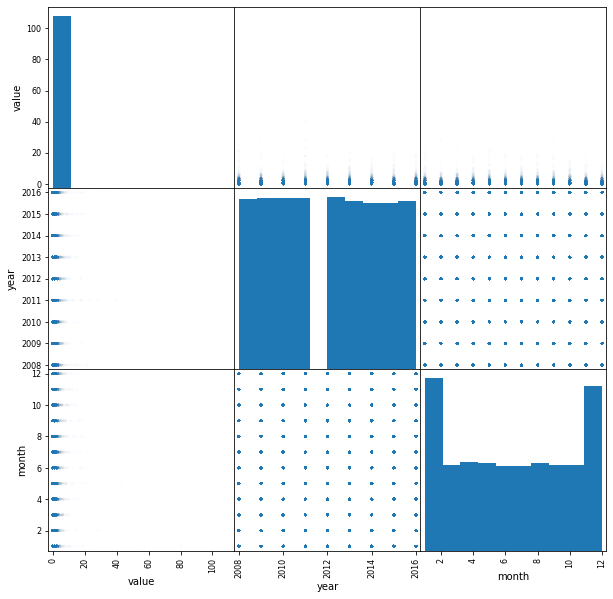

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [14]:
data.corr()

,value,year,month
value,1.000000,-0.000676,-0.000316
year,-0.000676,1.000000,-0.002693
month,-0.000316,-0.002693,1.000000


Явной корреляции между данными числовыми характеристиками не наблюдается.

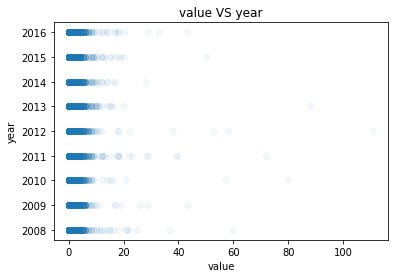

In [15]:
plt.plot(data['value'], data['year'], 'o', alpha = 0.05)
plt.xlabel('value')
plt.ylabel('year')
plt.title('value VS year')
pass

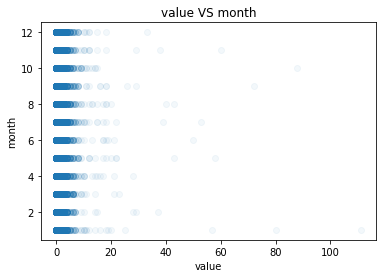

In [16]:
plt.plot(data['value'], data['month'], 'o', alpha = 0.05)
plt.xlabel('value')
plt.ylabel('month')
plt.title('value VS month')
pass

Категориальные и числовые признаки в задаче.

In [17]:
#temp = data['value']
#for ind in data.index:
#    temp.at[ind] = int(data.at[ind, 'lsoa_code'][2:])
#data['lsoa_code'] = temp

In [18]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print("Категориальные признаки: ", categorical_columns)
print("Числовые признаки: ", numerical_columns)

Категориальные признаки:  ['lsoa_code', 'borough', 'major_category', 'minor_category']
Числовые признаки:  ['value', 'year', 'month']


In [19]:
for c in categorical_columns:
    print(c, data[c].unique())

lsoa_code ['E01001116' 'E01001646' 'E01000677' ... 'E01002996' 'E01002108'
 'E01001562']
borough ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
major_category ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
minor_category ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Th

In [20]:
categorical_columns.remove('lsoa_code')

result_columns = ['borough']
categorical_columns.remove('borough')

data_nonbinary = pd.get_dummies(data[categorical_columns])
print(data_nonbinary.columns)

data_result = pd.get_dummies(data[result_columns])
result = data_result['borough_Westminster']
print(data_result.columns)

Index(['major_category_Burglary', 'major_category_Criminal Damage',
       'major_category_Drugs', 'major_category_Fraud or Forgery',
       'major_category_Other Notifiable Offences', 'major_category_Robbery',
       'major_category_Sexual Offences', 'major_category_Theft and Handling',
       'major_category_Violence Against the Person',
       'minor_category_Assault with Injury',
       'minor_category_Burglary in Other Buildings',
       'minor_category_Burglary in a Dwelling',
       'minor_category_Business Property', 'minor_category_Common Assault',
       'minor_category_Counted per Victim',
       'minor_category_Criminal Damage To Dwelling',
       'minor_category_Criminal Damage To Motor Vehicle',
       'minor_category_Criminal Damage To Other Building',
       'minor_category_Drug Trafficking', 'minor_category_Going Equipped',
       'minor_category_Handling Stolen Goods', 'minor_category_Harassment',
       'minor_category_Motor Vehicle Interference & Tampering',
       

Осуществим нормализацию числовых признаков - приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [21]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,value,year,month
count,39999.000000,39999.000000,39999.000000
mean,0.483187,2011.976799,6.457936
std,1.714047,2.579253,3.437647
min,0.000000,2008.000000,1.000000
25%,0.000000,2010.000000,3.000000
50%,0.000000,2012.000000,6.000000
75%,1.000000,2014.000000,9.000000
max,111.000000,2016.000000,12.000000


In [22]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [23]:
data_numerical.describe()

,value,year,month
count,3.999900e+04,3.999900e+04,3.999900e+04
mean,1.023873e-16,-3.311525e-14,-3.061378e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.818983e-01,-1.541842e+00,-1.587696e+00
25%,-2.818983e-01,-7.664233e-01,-1.005902e+00
50%,-2.818983e-01,8.995078e-03,-1.332122e-01
75%,3.015161e-01,7.844135e-01,7.394778e-01
max,6.447711e+01,1.559832e+00,1.612168e+00


In [24]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)

In [25]:
data.describe()

,value,year,month,major_category_Burglary,major_category_Criminal Damage,major_category_Drugs,major_category_Fraud or Forgery,major_category_Other Notifiable Offences,major_category_Robbery,major_category_Sexual Offences,...,minor_category_Other Theft Person,minor_category_Other violence,minor_category_Personal Property,minor_category_Possession Of Drugs,minor_category_Rape,minor_category_Theft From Motor Vehicle,minor_category_Theft From Shops,minor_category_Theft/Taking Of Motor Vehicle,minor_category_Theft/Taking of Pedal Cycle,minor_category_Wounding/GBH
count,3.999900e+04,3.999900e+04,3.999900e+04,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,...,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000,39999.000000
mean,1.023873e-16,-3.311525e-14,-3.061378e-16,0.077577,0.150154,0.089052,0.016850,0.057026,0.069027,0.007625,...,0.039226,0.037626,0.038526,0.040176,0.001975,0.037076,0.033001,0.038151,0.039551,0.039876
std,1.000000e+00,1.000000e+00,1.000000e+00,0.267508,0.357227,0.284823,0.128712,0.231896,0.253503,0.086990,...,0.194135,0.190292,0.192465,0.196374,0.044398,0.188950,0.178641,0.191563,0.194904,0.195670
min,-2.818983e-01,-1.541842e+00,-1.587696e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.818983e-01,-7.664233e-01,-1.005902e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.818983e-01,8.995078e-03,-1.332122e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.015161e-01,7.844135e-01,7.394778e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.447711e+01,1.559832e+00,1.612168e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
X = data

In [27]:
y = result

In [28]:
feature_names = X.columns

In [29]:
print('Характеристики: ', feature_names)

Характеристики:  Index(['value', 'year', 'month', 'major_category_Burglary',
       'major_category_Criminal Damage', 'major_category_Drugs',
       'major_category_Fraud or Forgery',
       'major_category_Other Notifiable Offences', 'major_category_Robbery',
       'major_category_Sexual Offences', 'major_category_Theft and Handling',
       'major_category_Violence Against the Person',
       'minor_category_Assault with Injury',
       'minor_category_Burglary in Other Buildings',
       'minor_category_Burglary in a Dwelling',
       'minor_category_Business Property', 'minor_category_Common Assault',
       'minor_category_Counted per Victim',
       'minor_category_Criminal Damage To Dwelling',
       'minor_category_Criminal Damage To Motor Vehicle',
       'minor_category_Criminal Damage To Other Building',
       'minor_category_Drug Trafficking', 'minor_category_Going Equipped',
       'minor_category_Handling Stolen Goods', 'minor_category_Harassment',
       'minor_categor

In [30]:
X=X.to_numpy()
y=y.to_numpy()

In [31]:
print('Размерность массива признаков: ', X.shape)
print('Размерность вектора значений: ', y.shape)
N, d = X.shape

Размерность массива признаков:  (39999, 44)
Размерность вектора значений:  (39999,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

27999 12000


kNN - метод k ближайших соседей

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8) # 8 ближайших соседей
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [34]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающей выборке: ", err_train)
print('Ошибка на тестовой выборке:', err_test)

Ошибка на обучающей выборке:  0.029501053609057467
Ошибка на тестовой выборке: 0.026166666666666668


In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[11686     1]
 [  313     0]]


In [36]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 7, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Наименьшая ошибка: ", best_cv_err, ", достигнуто при k = ", best_n_neighbors)

Наименьшая ошибка:  0.029501053609057415 , достигнуто при k =  7


In [37]:
knn = KNeighborsClassifier(n_neighbors = 7) # 7 ближайший сосед
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [38]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающей выборке: ", err_train)
print('Ошибка на тестовой выборке:', err_test)

Ошибка на обучающей выборке:  0.029501053609057467
Ошибка на тестовой выборке: 0.026166666666666668


In [39]:
print(confusion_matrix(y_test, y_test_predict))

[[11686     1]
 [  313     0]]


In [40]:
nnb = [6, 7, 8, 9]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Наименьшая ошибка: ", best_cv_err, ", достигнуто при k = ", best_n_neighbors)

Наименьшая ошибка:  0.029501053609057415 , достигнуто при k =  6


In [41]:
knn = KNeighborsClassifier(n_neighbors = 6) # 6 ближайший сосед
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [42]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print("Ошибка на обучающей выборке: ", err_train)
print('Ошибка на тестовой выборке:', err_test)

Ошибка на обучающей выборке:  0.029501053609057467
Ошибка на тестовой выборке: 0.026166666666666668


Метод главных компонент

In [43]:
from sklearn.decomposition import PCA
components = []

for i in range(44):
    components.append(i+1)

train_error = []
test_error = []

for num in components:
    pca = PCA(n_components=num)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    
    train_error.append(np.mean(y_train != knn.predict(X_train)))
    test_error.append(np.mean(y_test != knn.predict(X_test)))

In [44]:
print('Массив ошибок на тестовой выборке: ', test_error)

Массив ошибок на тестовой выборке:  [0.051, 0.050333333333333334, 0.052583333333333336, 0.05333333333333334, 0.05675, 0.0525, 0.052333333333333336, 0.058583333333333334, 0.05125, 0.052, 0.0535, 0.05608333333333333, 0.05633333333333333, 0.053, 0.05533333333333333, 0.0535, 0.05125, 0.058333333333333334, 0.05591666666666667, 0.05583333333333333, 0.05533333333333333, 0.0565, 0.050333333333333334, 0.051916666666666667, 0.0515, 0.051166666666666666, 0.05341666666666667, 0.05375, 0.05558333333333333, 0.05308333333333334, 0.05366666666666667, 0.05308333333333334, 0.05383333333333333, 0.051833333333333335, 0.05291666666666667, 0.052083333333333336, 0.052083333333333336, 0.052083333333333336, 0.052083333333333336, 0.052083333333333336, 0.052083333333333336, 0.052083333333333336, 0.052083333333333336, 0.052083333333333336]


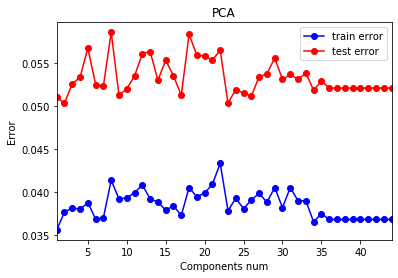

In [45]:
plt.figure()
plt.plot(components, train_error, 'b-o', label = 'train error')
plt.plot(components, test_error, 'r-o', label = 'test error')
plt.xlim([1, 44])
plt.title('PCA')
plt.xlabel('Components num')
plt.ylabel('Error')
plt.legend()
plt.show()

In [46]:
np.min(test_error)

0.050333333333333334

In [47]:
np.argmin(test_error)

1

ЛР №3

In [48]:
from sklearn.neural_network import MLPClassifier

In [49]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,50), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [50]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [51]:
print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.029536769170327513, Test error: 0.026083333333333333


In [52]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


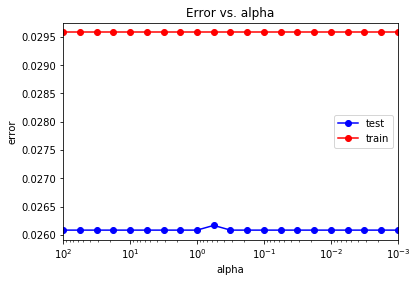

In [53]:
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [54]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.029572484731597556, 	Min test error: 0.026083333333333333
Alpha:  0.001


In [55]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 50),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.029572484731597556, Test error: 0.026083333333333333


In [56]:
neurons_arr = np.arange(10,150, 5)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron, 50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

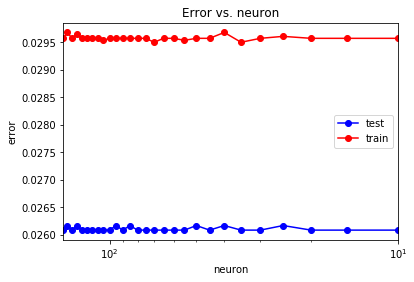

In [57]:
plt.semilogx(neurons_arr, test_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, train_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neuron')
plt.xlabel('neuron')
plt.ylabel('error')
plt.legend()
pass

In [58]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
neuron_opt = neurons_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Neuron: ', neuron_opt)

Min train error: 0.029501053609057467, 	Min test error: 0.026083333333333333
Neuron:  10


In [59]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt, 50),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.029572484731597556, Test error: 0.026083333333333333


Random forests

In [60]:
from sklearn.ensemble import RandomForestClassifier

estiamtors = np.arange(500,1500, 100)
test_err = []
train_err = []
oob_score = []
for estimator in estiamtors:
    rf = RandomForestClassifier(n_estimators = estimator, random_state = 42, oob_score=True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_score.append(rf.oob_score_)

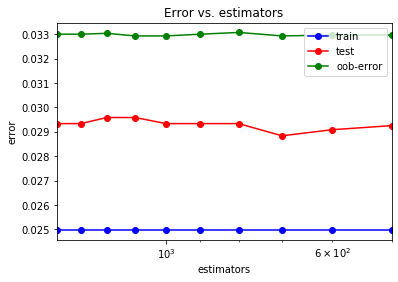

In [61]:
plt.semilogx(estiamtors, train_err, 'b-o', label = 'train')
plt.semilogx(estiamtors, test_err, 'r-o', label = 'test')
plt.semilogx(estiamtors, np.ones(len(oob_score))-oob_score, 'g-o', label = 'oob-error')
plt.xlim([np.max(estiamtors), np.min(estiamtors)])
plt.title('Error vs. estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

In [62]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
estimators_opt = estiamtors[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Estimators: ', estimators_opt)

Min train error: 0.024965177327761705, 	Min test error: 0.028833333333333332
Estimators:  700


Gradient boosted trees

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

estiamtors = np.arange(900,1200, 100)
test_err = []
train_err = []
for estimator in estiamtors:
    gbt = GradientBoostingClassifier(n_estimators = estimator, random_state = 42)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

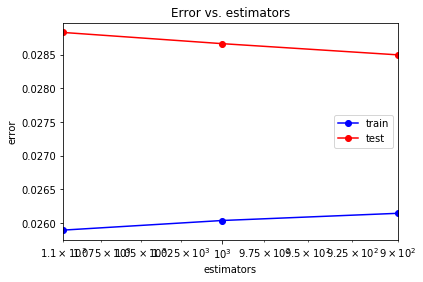

In [64]:
plt.semilogx(estiamtors, train_err, 'b-o', label = 'train')
plt.semilogx(estiamtors, test_err, 'r-o', label = 'test')
plt.xlim([np.max(estiamtors), np.min(estiamtors)])
plt.title('Error vs. estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

In [65]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
estimators_opt = estiamtors[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Estimators: ', estimators_opt)

Min train error: 0.025893781920782885, 	Min test error: 0.0285
Estimators:  900
